<a href="https://colab.research.google.com/github/RhythemNagpal/leukemia_detector/blob/master/leukemia_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leaukemia detection using Soft Computing Techniques

##Importing Libraries to be used 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [1891]:
! git clone https://github.com/RhythemNagpal/leukemia_detector.git

fatal: destination path 'leukemia_detector' already exists and is not an empty directory.


In [1892]:
patients = pd.read_csv('leukemia_detector/leukemiaPatients.csv',header=None)
patients.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,1,-4,-116,-125,241,-191,-411,-31,-240,150,24,19,-669,-664,-311,297,353,-96,-291,17878,21,218,-103,52,-242,134,-105,-207,-42,-59,-39,-183,77,-495,-124,-111,51,132,647,1065,...,303,-559,317,585,546,328,16876,13859,1102,375,-105,10547,10235,685,4431,-210,18,403,-31,207,135,86,-228,216,120,247,399,-220,-1651,429,173,755,-23,573,42,987,279,22,662,-46
1,1,15,-114,2,193,-51,-155,29,-105,42,524,-70,-344,-285,-53,38,-142,-125,-118,26052,-67,121,-69,6,-198,61,-93,-190,-18,-49,-66,-117,-38,-262,-106,-133,-95,-22,202,442,...,99,-17,190,119,390,151,9184,19228,374,61,131,9355,11461,-95,1028,-142,-26,58,-2,113,-30,54,-71,95,59,19,45,-78,-887,314,173,492,54,277,-13,279,51,6,2484,-2
2,1,-318,-192,-95,312,-139,-344,324,-237,105,167,-50,-820,-231,-273,208,99,-126,-534,11983,-81,114,-67,32,-162,175,-20,-109,31,-23,-21,-246,-31,-589,-353,-314,-435,135,423,45,...,233,12,1034,55,630,1835,21787,15527,385,196,-253,13538,14783,104,3624,-242,-97,386,59,308,32,60,-326,139,-118,247,192,-394,-1634,208,225,737,63,472,33,737,227,-9,371,-31
3,1,-32,-49,49,230,-367,-508,-349,-194,34,-56,147,-841,-657,-240,-15,227,-166,-453,23508,-126,61,-35,45,-94,125,-125,-171,66,-56,-68,-217,-48,-775,-235,-266,-125,85,295,9042,...,187,-453,338,-39,358,391,21617,17676,852,74,245,10144,9846,190,2633,-230,20,207,-20,132,27,53,-205,319,149,281,306,-442,-2404,385,36,592,57,215,-22,588,361,-26,133,-32
4,1,-124,-79,-37,330,-188,-423,-31,-223,-82,176,226,-1010,-513,-333,30,177,-69,-411,17996,20,371,-68,6,-134,111,-44,-232,-7,-144,-56,-217,17,-657,-332,-277,-36,123,532,5199,...,385,-1025,705,9230,665,925,24514,14574,1338,67,-56,10373,9002,745,2842,-348,111,330,-19,295,80,109,-54,388,172,292,205,-396,-2525,688,348,938,-15,433,-2,1170,284,39,298,-3


In [1893]:
x=patients.iloc[:,1:]
y=patients.iloc[:,0]
acc=[[0]*5]*2
acc=np.zeros((2,5))
print("Shape of Feature set",x.shape)
print("Shape of target",y.shape)

Shape of Feature set (72, 7129)
Shape of target (72,)


##Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

##Scalling Features

In [0]:
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##Modals

###Logistic Regression

In [1896]:
logreg = LogisticRegression(penalty='l2',class_weight='balanced',C=50)
logreg.fit(X_train, y_train)

LogisticRegression(C=50, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1897]:
pred_train_logreg=logreg.predict(X_train)
pred_test_logreg=logreg.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_logreg))
print("Test set predictions:\n{}".format(pred_test_logreg))

Train set predictions:
[ 1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1
 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1]
Test set predictions:
[ 1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1]


In [1898]:
print("Accuracy of Logistic Regression classifier on train set: %.2f"%accuracy_score(pred_train_logreg,y_train))
print("Accuracy of Logistic Regression classifier on test set: %.2f"%accuracy_score(pred_test_logreg,y_test))
acc[0][0]=accuracy_score(pred_train_logreg,y_train)
acc[1][0]=accuracy_score(pred_test_logreg,y_test)
print(acc)

Accuracy of Logistic Regression classifier on train set: 1.00
Accuracy of Logistic Regression classifier on test set: 0.82
[[1.         0.         0.         0.         0.        ]
 [0.81818182 0.         0.         0.         0.        ]]


In [1899]:
print(confusion_matrix(y_test, pred_test_logreg))
print(classification_report(y_test, pred_test_logreg))

[[13  4]
 [ 0  5]]
              precision    recall  f1-score   support

          -1       1.00      0.76      0.87        17
           1       0.56      1.00      0.71         5

    accuracy                           0.82        22
   macro avg       0.78      0.88      0.79        22
weighted avg       0.90      0.82      0.83        22



###Principal Component Analysis

In [0]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

###Support Vector Machine

In [1901]:
svm = SVC(kernel='rbf',degree=15)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=15, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1902]:
pred_train_svm=svm.predict(X_train)
pred_test_svm=svm.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_svm))
print("Test set predictions:\n{}".format(pred_test_svm))

Train set predictions:
[ 1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1 -1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1]
Test set predictions:
[ 1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1]


In [1903]:
print("Accuracy of SVM classifier on train set: %.2f"%accuracy_score(pred_train_svm,y_train))
print("Accuracy of SVM classifier on test set: %.2f"%accuracy_score(pred_test_svm,y_test))
acc[0][1]=accuracy_score(pred_train_svm,y_train)
acc[1][1]=accuracy_score(pred_test_svm,y_test)

Accuracy of SVM classifier on train set: 0.92
Accuracy of SVM classifier on test set: 0.86


In [1904]:
print(confusion_matrix(y_test, pred_test_svm))
print(classification_report(y_test, pred_test_svm))

[[15  2]
 [ 1  4]]
              precision    recall  f1-score   support

          -1       0.94      0.88      0.91        17
           1       0.67      0.80      0.73         5

    accuracy                           0.86        22
   macro avg       0.80      0.84      0.82        22
weighted avg       0.88      0.86      0.87        22



###KNearestNeighbours

In [1905]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [1906]:
pred_train_knn=knn.predict(X_train)
pred_test_knn=knn.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_knn))
print("Test set predictions:\n{}".format(pred_test_knn))

Train set predictions:
[ 1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1]
Test set predictions:
[ 1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1]


In [1907]:
print("Accuracy of KNearest Neighbour classifier on train set: %.2f"%accuracy_score(pred_train_knn,y_train))
print("Accuracy of KNearest Neighbour classifier on test set: %.2f"%accuracy_score(pred_test_knn,y_test))
acc[0][2]=accuracy_score(pred_train_knn,y_train)
acc[1][2]=accuracy_score(pred_test_knn,y_test)

Accuracy of KNearest Neighbour classifier on train set: 0.94
Accuracy of KNearest Neighbour classifier on test set: 0.86


([<matplotlib.axis.XTick at 0x7f4ef3b1e080>,
 <a list of 5 Text major ticklabel objects>)

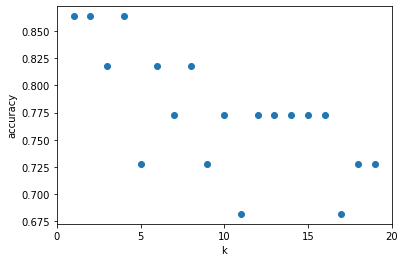

In [1908]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [1909]:
print(confusion_matrix(y_test, pred_test_knn))
print(classification_report(y_test, pred_test_knn))

[[15  2]
 [ 1  4]]
              precision    recall  f1-score   support

          -1       0.94      0.88      0.91        17
           1       0.67      0.80      0.73         5

    accuracy                           0.86        22
   macro avg       0.80      0.84      0.82        22
weighted avg       0.88      0.86      0.87        22



###Decision Tree

In [1910]:
dtree = DecisionTreeClassifier(criterion='gini',max_features=5,min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1911]:
pred_train_dtree=dtree.predict(X_train)
pred_test_dtree=dtree.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_dtree))
print("Test set predictions:\n{}".format(pred_test_dtree))

Train set predictions:
[ 1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1
 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1]
Test set predictions:
[ 1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1]


In [1912]:
print("Accuracy of Decision Tree classifier on train set: %.2f"%accuracy_score(pred_train_dtree,y_train))
print("Accuracy of Decision Tree classifier on test set: %.2f"%accuracy_score(pred_test_dtree,y_test))
acc[0][3]=accuracy_score(pred_train_dtree,y_train)
acc[1][3]=accuracy_score(pred_test_dtree,y_test)

Accuracy of Decision Tree classifier on train set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


In [1913]:
print(confusion_matrix(y_test, pred_test_dtree))
print(classification_report(y_test, pred_test_dtree))

[[13  4]
 [ 2  3]]
              precision    recall  f1-score   support

          -1       0.87      0.76      0.81        17
           1       0.43      0.60      0.50         5

    accuracy                           0.73        22
   macro avg       0.65      0.68      0.66        22
weighted avg       0.77      0.73      0.74        22



###Random Forest 

In [1914]:
forest=RandomForestClassifier(criterion='entropy',n_estimators=5,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [1915]:
pred_train_forest=forest.predict(X_train)
pred_test_forest=forest.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_forest))
print("Test set predictions:\n{}".format(pred_test_forest))

Train set predictions:
[ 1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1
 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1]
Test set predictions:
[ 1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [1916]:
print("Accuracy of Random Forest classifier on train set: %.2f"%accuracy_score(pred_train_forest,y_train))
print("Accuracy of Random Forest classifier on test set: %.2f"%accuracy_score(pred_test_forest,y_test))
acc[0][4]=accuracy_score(pred_train_forest,y_train)
acc[1][4]=accuracy_score(pred_test_forest,y_test)

Accuracy of Random Forest classifier on train set: 1.00
Accuracy of Random Forest classifier on test set: 0.86


In [1917]:
print(confusion_matrix(y_test, pred_test_forest))
print(classification_report(y_test, pred_test_forest))


[[14  3]
 [ 0  5]]
              precision    recall  f1-score   support

          -1       1.00      0.82      0.90        17
           1       0.62      1.00      0.77         5

    accuracy                           0.86        22
   macro avg       0.81      0.91      0.84        22
weighted avg       0.91      0.86      0.87        22



#Plotting Accuracy of Different Modals

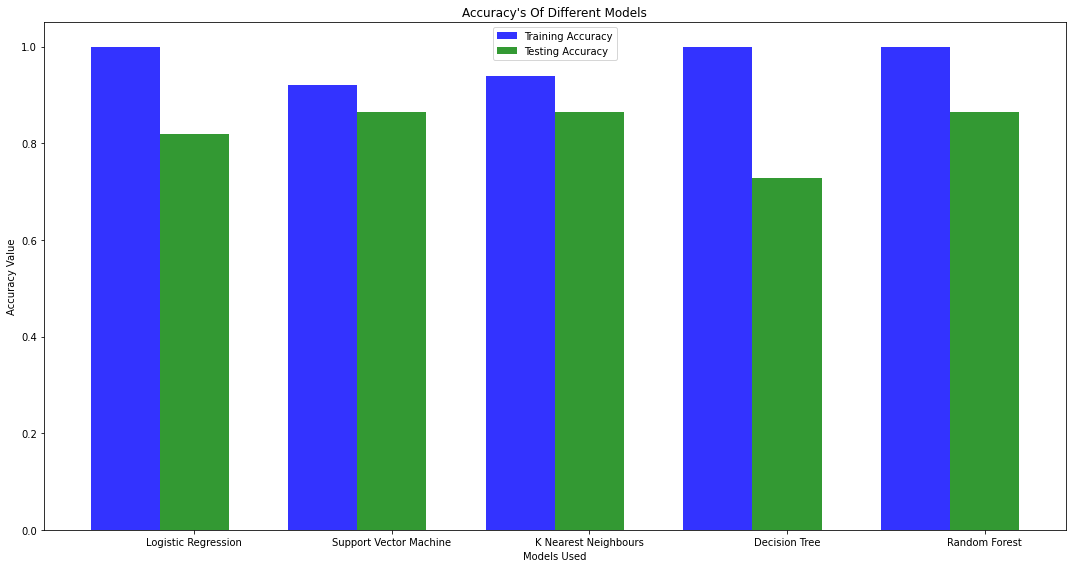

In [1918]:
n_groups = 5
acc_trn = acc[0]
acc_tst = acc[1]

# create plot
plt.figure(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, acc_trn, bar_width,
alpha=opacity,
color='b',
label='Training Accuracy')

rects2 = plt.bar(index + bar_width, acc_tst, bar_width,
alpha=opacity,
color='g',
label='Testing Accuracy')

plt.xlabel('Models Used')
plt.ylabel('Accuracy Value')
plt.title("Accuracy's Of Different Models")
plt.xticks(index + bar_width, ('Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbours', 'Decision Tree','Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()